In [4]:
import pandas as pd
import numpy as np

# 读取数据
sales_data = pd.read_excel('./附件2.xlsx')  # 销售流水明细数据
price_data = pd.read_excel('./附件3.xlsx')  # 批发价格数据

# 查看数据的基本信息
(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   销售日期        878503 non-null  datetime64[ns]
 1   扫码销售时间      878503 non-null  object        
 2   单品编码        878503 non-null  int64         
 3   销量(千克)      878503 non-null  float64       
 4   销售单价(元/千克)  878503 non-null  float64       
 5   销售类型        878503 non-null  object        
 6   是否打折销售      878503 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 46.9+ MB


In [5]:
# 查看数据的基本信息
(price_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55982 entries, 0 to 55981
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   日期          55982 non-null  datetime64[ns]
 1   单品编码        55982 non-null  int64         
 2   批发价格(元/千克)  55982 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.3 MB


In [6]:
# 数据清洗：处理缺失值和异常值
# 示例：去除销售量为负值或缺失的记录
sales_data = sales_data[sales_data['销量(千克)'] > 0]
sales_data = sales_data.dropna()

#去除无用的列:"扫码销售时间", "销售类型","是否打折销售"
sales_data = sales_data.drop(columns=["扫码销售时间", "销售类型","是否打折销售"])


In [7]:
sales_data = sales_data[sales_data['销售单价(元/千克)'] > 0]
simple_sales_data = sales_data.drop(columns=['销售单价(元/千克)'])

In [8]:
sales_data.head()

,销售日期,单品编码,销量(千克),销售单价(元/千克)
0,2020-07-01,102900005117056,0.396,7.6
1,2020-07-01,102900005115960,0.849,3.2
2,2020-07-01,102900005117056,0.409,7.6
3,2020-07-01,102900005115823,0.421,10.0
4,2020-07-01,102900005115908,0.539,8.0


In [9]:
price_data.head()

,日期,单品编码,批发价格(元/千克)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03


In [10]:
# 数据清洗：处理缺失值和异常值
price_data = price_data.dropna()[price_data["批发价格(元/千克)"] > 0]
price_data.head()

,日期,单品编码,批发价格(元/千克)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03


In [12]:
category_data = pd.read_excel('./附件1.xlsx')  # 包含"单品编码"和"分类名称"
category_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   单品编码    251 non-null    int64 
 1   单品名称    251 non-null    object
 2   分类编码    251 non-null    int64 
 3   分类名称    251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


In [13]:
# 将分类信息与sales_data合并
sales_data = pd.merge(sales_data, category_data[['单品编码', '分类名称']], on='单品编码', how='left')


# 将分类信息与price_data合并
price_data = pd.merge(price_data, category_data[['单品编码', '分类名称']], on='单品编码', how='left')

In [10]:
sales_data.head()

,销售日期,单品编码,销量(千克),销售单价(元/千克),分类名称
0,2020-07-01,102900005117056,0.396,7.6,辣椒类
1,2020-07-01,102900005115960,0.849,3.2,花叶类
2,2020-07-01,102900005117056,0.409,7.6,辣椒类
3,2020-07-01,102900005115823,0.421,10.0,花叶类
4,2020-07-01,102900005115908,0.539,8.0,花叶类


In [11]:
price_data.head()

,日期,单品编码,批发价格(元/千克),分类名称
0,2020-07-01,102900005115762,3.88,花叶类
1,2020-07-01,102900005115779,6.72,花叶类
2,2020-07-01,102900005115786,3.19,花叶类
3,2020-07-01,102900005115793,9.24,花叶类
4,2020-07-01,102900005115823,7.03,花叶类


In [12]:
# 检查是否有未匹配到的单品编码
missing_categories_sales = sales_data[sales_data['分类名称'].isnull()]
missing_categories_price = price_data[price_data['分类名称'].isnull()]

print(f"未匹配到分类名称的销售数据:\n{missing_categories_sales}")
print(f"未匹配到分类名称的价格数据:\n{missing_categories_price}")

未匹配到分类名称的销售数据:
Empty DataFrame
Columns: [销售日期, 单品编码, 销量(千克), 销售单价(元/千克), 分类名称]
Index: []
未匹配到分类名称的价格数据:
Empty DataFrame
Columns: [日期, 单品编码, 批发价格(元/千克), 分类名称]
Index: []


In [13]:
#####################################################暂时废弃
# 计算每天每类蔬菜的总销售量
daily_category_sales = sales_data.groupby(['销售日期', '分类名称'])['销量(千克)'].sum().reset_index()

In [14]:

# 查看每日分类销售数据
display(daily_category_sales.head())
# 将每日分类销售数据保存到本地
daily_category_sales.to_excel('./每日分类销售数据.xlsx', index=False)

,销售日期,分类名称,销量(千克)
0,2020-07-01,水生根茎类,4.850
1,2020-07-01,花叶类,205.402
2,2020-07-01,花菜类,47.076
3,2020-07-01,茄类,35.374
4,2020-07-01,辣椒类,76.715


In [15]:
import scipy.stats as stats

# 计算六大类蔬菜的销售量描述性统计
category_stats = sales_data.groupby('分类名称')['销量(千克)'].agg(
    min_value='min',
    max_value='max',
    mean_value='mean',
    median_value='median',
    std_value='std',
    skewness=lambda x: stats.skew(x),
    kurtosis=lambda x: stats.kurtosis(x)
).reset_index()
display(category_stats)
#################################暂时废弃end

,分类名称,min_value,max_value,mean_value,median_value,std_value,skewness,kurtosis
0,水生根茎类,0.050,17.000,0.692808,0.556,0.550253,5.909290,77.536170
1,花叶类,0.003,160.000,0.598753,0.489,0.463191,126.112833,42368.736784
2,花菜类,0.022,12.487,0.482985,0.436,0.199439,6.034565,236.897322
3,茄类,0.050,12.500,0.500036,0.461,0.234115,5.039027,166.700290
4,辣椒类,0.004,10.014,0.440826,0.344,0.308538,1.424405,14.573843
5,食用菌,0.011,25.000,0.513221,0.352,0.368531,3.201207,152.633432


In [16]:
# 更改sales_data的"销售日期"列名为"日期"
sales_data = sales_data.rename(columns={"销售日期": "日期"})

In [17]:
from itertools import product

# 生成完整的日期和分类名称组合
# 获取实际出现的销售日期和分类名称
all_dates = sales_data['日期'].unique()  # 实际销售日期
all_categories = sales_data['分类名称'].unique()  # 所有的分类名称

In [18]:
display(all_dates)


<DatetimeArray>
['2020-07-01 00:00:00', '2020-07-02 00:00:00', '2020-07-03 00:00:00',
 '2020-07-04 00:00:00', '2020-07-05 00:00:00', '2020-07-06 00:00:00',
 '2020-07-07 00:00:00', '2020-07-08 00:00:00', '2020-07-09 00:00:00',
 '2020-07-10 00:00:00',
 ...
 '2023-06-21 00:00:00', '2023-06-22 00:00:00', '2023-06-23 00:00:00',
 '2023-06-24 00:00:00', '2023-06-25 00:00:00', '2023-06-26 00:00:00',
 '2023-06-27 00:00:00', '2023-06-28 00:00:00', '2023-06-29 00:00:00',
 '2023-06-30 00:00:00']
Length: 1085, dtype: datetime64[ns]

In [19]:
all_categories

array(['辣椒类', '花叶类', '水生根茎类', '食用菌', '花菜类', '茄类'], dtype=object)

In [20]:
# 生成完整的日期和分类名称组合
full_index = pd.DataFrame(list(product(all_dates, all_categories)), columns=['日期', '分类名称'])
full_index

,日期,分类名称
0,2020-07-01,辣椒类
1,2020-07-01,花叶类
2,2020-07-01,水生根茎类
3,2020-07-01,食用菌
4,2020-07-01,花菜类
...,...,...
6505,2023-06-30,花叶类
6506,2023-06-30,水生根茎类
6507,2023-06-30,食用菌
6508,2023-06-30,花菜类


In [21]:
# 将实际销售数据与完整组合合并，并填充缺失的销售量为0
daily_category_sales = pd.merge(full_index, 
                                sales_data.groupby(['日期', '分类名称'])['销量(千克)'].sum().reset_index(), 
                                on=['日期', '分类名称'], 
                                how='left').fillna(0)
daily_category_sales
daily_category_sales.to_excel('./每日分类蔬菜销售数据.xlsx', index=False)

In [22]:
daily_category_sales

,日期,分类名称,销量(千克)
0,2020-07-01,辣椒类,76.715
1,2020-07-01,花叶类,205.402
2,2020-07-01,水生根茎类,4.850
3,2020-07-01,食用菌,35.365
4,2020-07-01,花菜类,47.076
...,...,...,...
6505,2023-06-30,花叶类,130.464
6506,2023-06-30,水生根茎类,19.419
6507,2023-06-30,食用菌,39.572
6508,2023-06-30,花菜类,28.087


In [23]:
category_stats = daily_category_sales.groupby('分类名称')['销量(千克)'].agg(
    min_value='min',
    max_value='max',
    mean_value='mean',
    median_value='median',
    std_value='std',
    skewness=lambda x: stats.skew(x),
    kurtosis=lambda x: stats.kurtosis(x)
).reset_index()
# 将统计结果导出为Excel文件
category_stats.to_excel('每日分类蔬菜销售量描述统计.xlsx', index=False)
category_stats

,分类名称,min_value,max_value,mean_value,median_value,std_value,skewness,kurtosis
0,水生根茎类,0.926,296.792,37.426315,30.289,31.367880,2.501471,12.075481
1,花叶类,31.298,1265.473,183.096362,173.210,86.299166,2.892772,25.976235
2,花菜类,0.000,186.155,38.515924,34.072,22.705944,1.519505,4.163430
3,茄类,0.000,118.931,20.683981,18.318,13.488303,1.587161,5.290122
4,辣椒类,6.066,604.231,84.465541,72.925,53.461673,3.139778,18.305400
5,食用菌,3.012,511.136,70.167489,57.535,48.521136,2.991957,16.801698


In [24]:
import pandas as pd
import scipy.stats as stats

def calculate_category_stats(df, category_column='分类名称', value_column='销售量'):
    """
    计算给定DataFrame中各分类的详细描述性统计量。

    参数:
    df (pd.DataFrame): 包含分类和对应值的DataFrame。
    category_column (str): 分类名称所在的列名。
    value_column (str): 需要计算描述性统计量的列名。

    返回:
    pd.DataFrame: 包含各分类的详细描述性统计量的DataFrame。
    """
    # 使用agg方法计算描述性统计量
    category_stats = df.groupby(category_column)[value_column].agg(
        min_value='min',
        max_value='max',
        mean_value='mean',
        median_value='median',
        std_value='std',
        skewness=lambda x: stats.skew(x),
        kurtosis=lambda x: stats.kurtosis(x)
    ).reset_index()

    return category_stats

# 示例调用
category_stats = calculate_category_stats(daily_category_sales, category_column='分类名称', value_column='销量(千克)')


# 将结果导出为Excel文件
category_stats.to_excel('六大品类销售量详细描述统计.xlsx', index=False)
# 查看结果
category_stats


,分类名称,min_value,max_value,mean_value,median_value,std_value,skewness,kurtosis
0,水生根茎类,0.926,296.792,37.426315,30.289,31.367880,2.501471,12.075481
1,花叶类,31.298,1265.473,183.096362,173.210,86.299166,2.892772,25.976235
2,花菜类,0.000,186.155,38.515924,34.072,22.705944,1.519505,4.163430
3,茄类,0.000,118.931,20.683981,18.318,13.488303,1.587161,5.290122
4,辣椒类,6.066,604.231,84.465541,72.925,53.461673,3.139778,18.305400
5,食用菌,3.012,511.136,70.167489,57.535,48.521136,2.991957,16.801698


In [25]:
# 计算六大品类的全时间段内总销售量
total_sales_by_category = daily_category_sales.groupby('分类名称')['销量(千克)'].sum().reset_index()

# 使用自定义的函数对全时间段的总销售量进行详细的描述性统计分析
# category_total_stats = calculate_category_stats(total_sales_by_category, 
#                                                 category_column='分类名称', 
#                                                 value_column='销售量')



# 将结果导出为Excel文件
total_sales_by_category.to_excel('六大品类总销售量统计.xlsx', index=False)
# 查看统计结果
print("六大品类的全时间段总销售量统计:")
total_sales_by_category

六大品类的全时间段总销售量统计:


,分类名称,销量(千克)
0,水生根茎类,40607.552
1,花叶类,198659.553
2,花菜类,41789.777
3,茄类,22442.119
4,辣椒类,91645.112
5,食用菌,76131.726


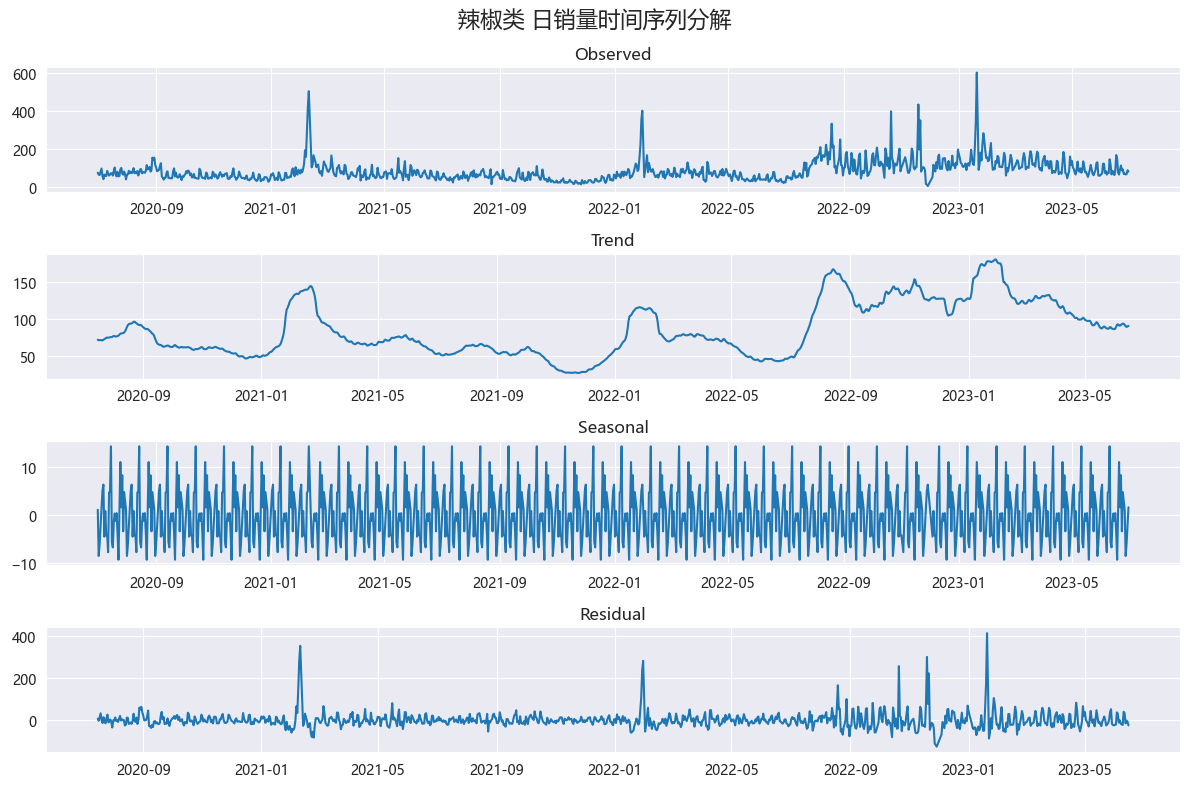

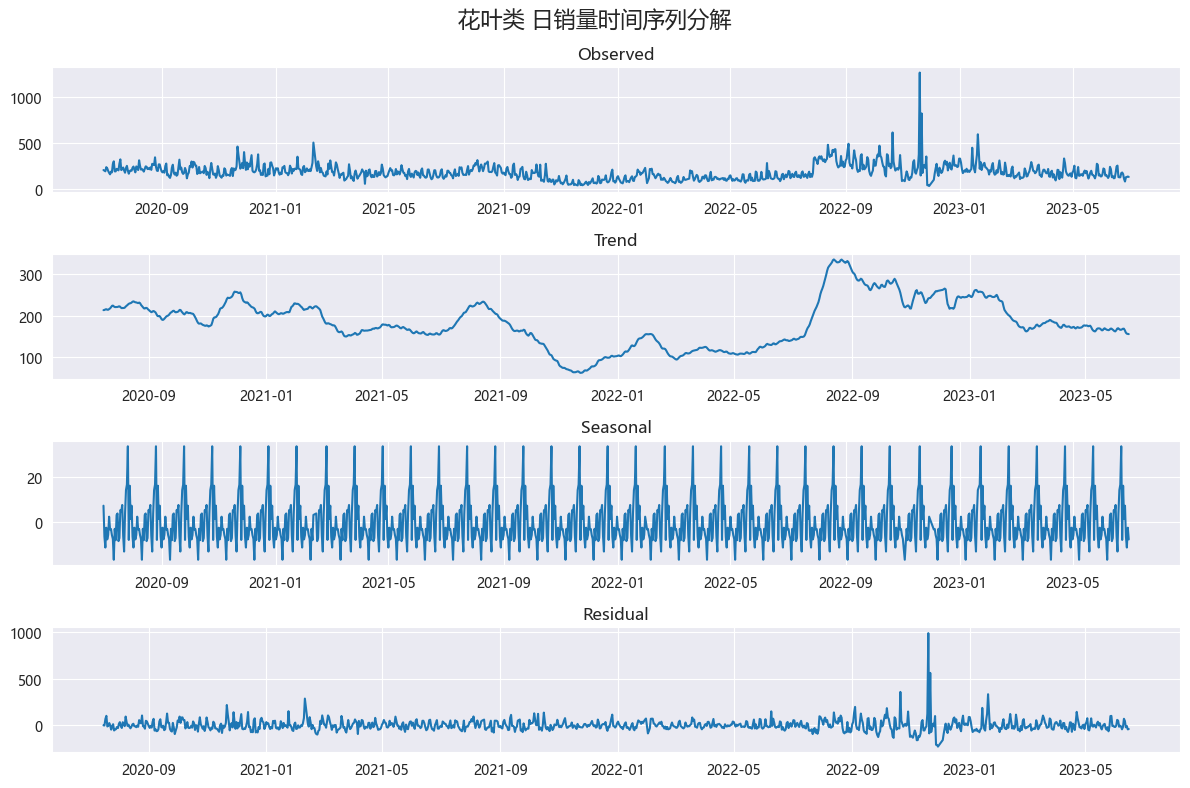

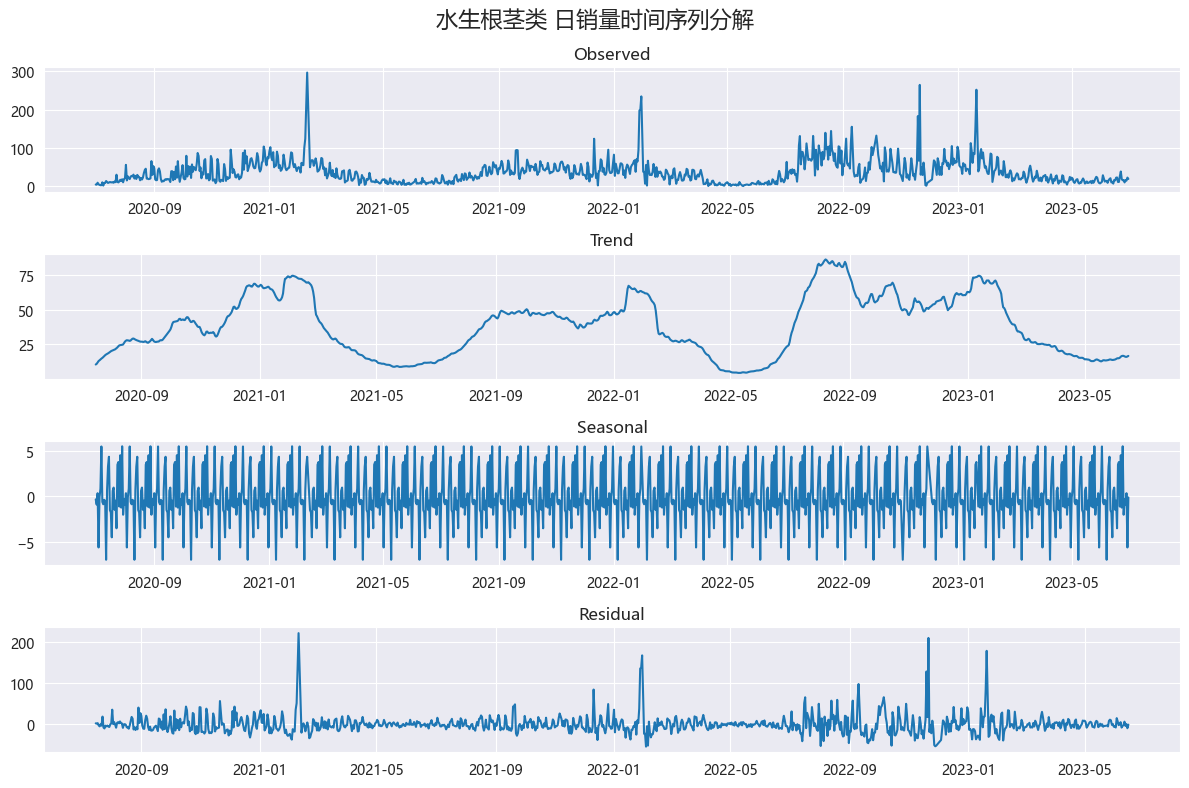

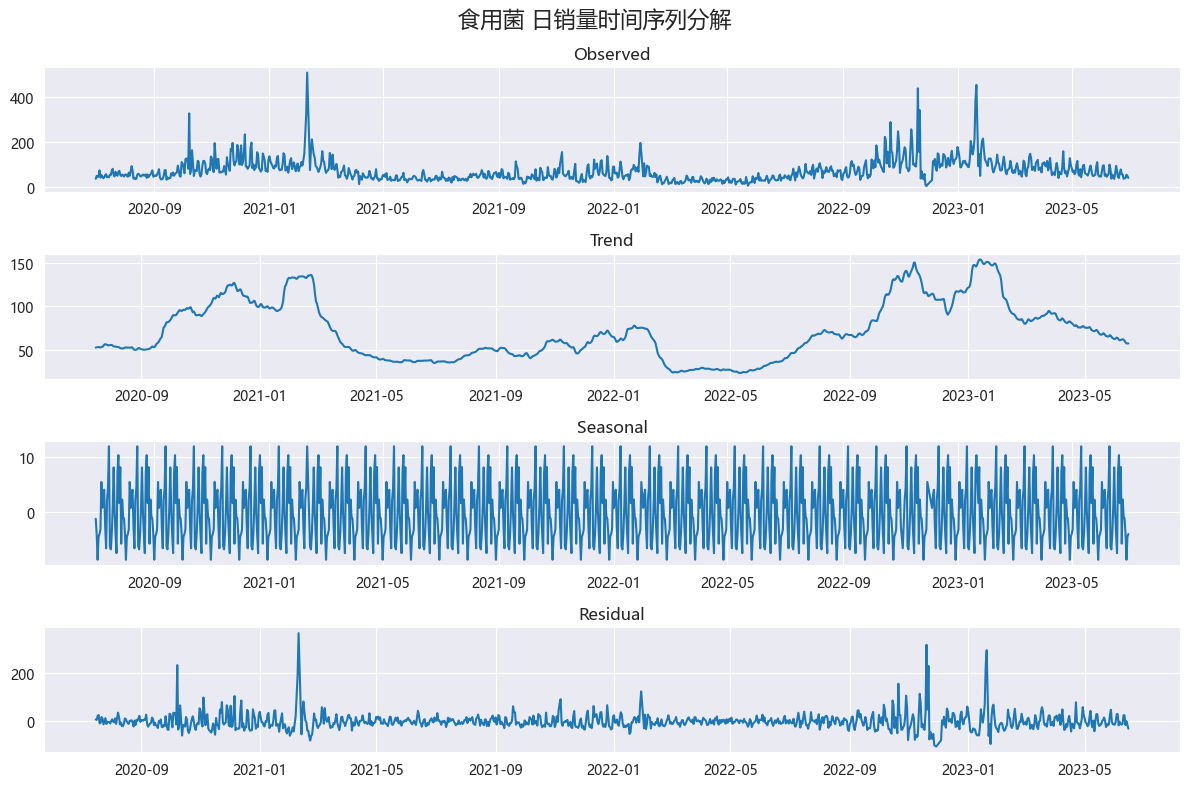

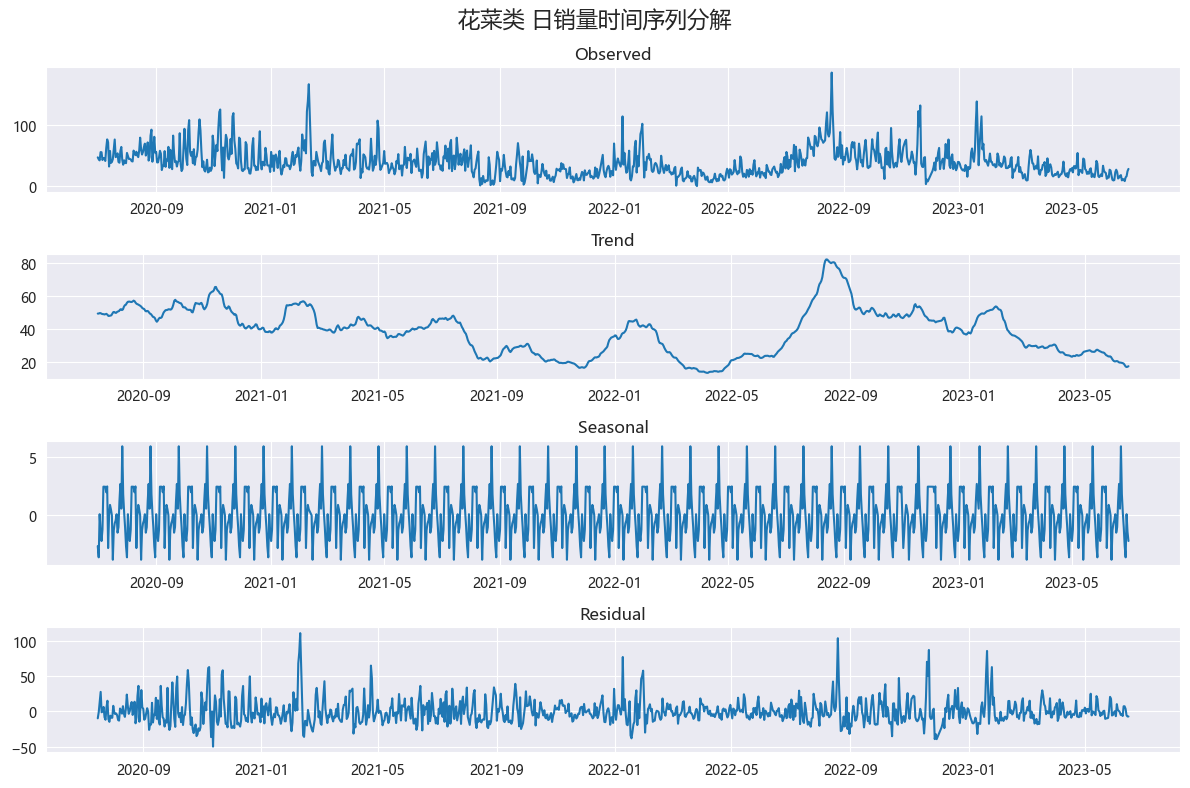

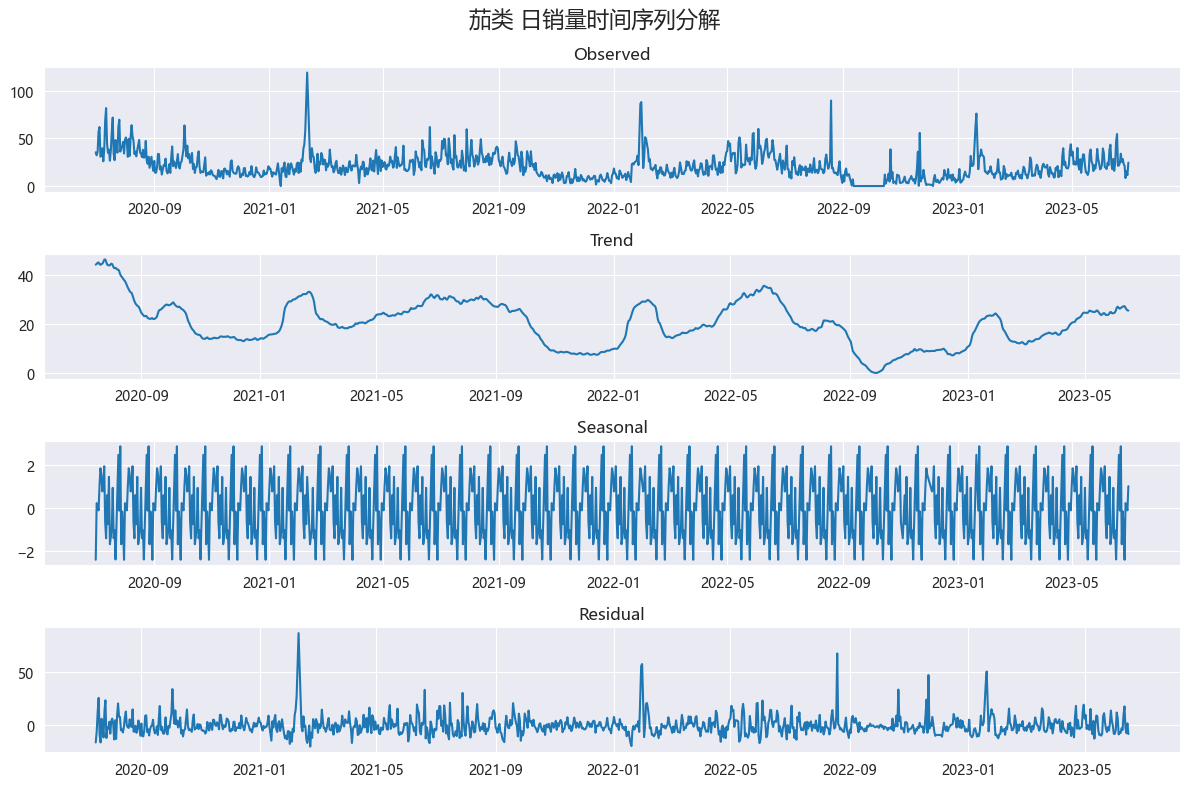

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc("font",family='Microsoft YaHei')
# 对每个品类的日销量进行时间序列分解
for category in daily_category_sales['分类名称'].unique():
    category_series = daily_category_sales[daily_category_sales['分类名称'] == category].set_index('日期')['销量(千克)']
    
    # 时间序列分解
    decomposition = seasonal_decompose(category_series, model='additive', period=30)
    
    # 绘制分解后的图表
    plt.figure(figsize=(12, 8))
    plt.suptitle(f'{category} 日销量时间序列分解', fontsize=16)
    
    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.title('Observed')
    
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.title('Trend')
    
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.title('Seasonal')
    
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.title('Residual')
    
    plt.tight_layout()
    plt.show()


In [27]:
category_array = daily_category_sales['分类名称'].unique()

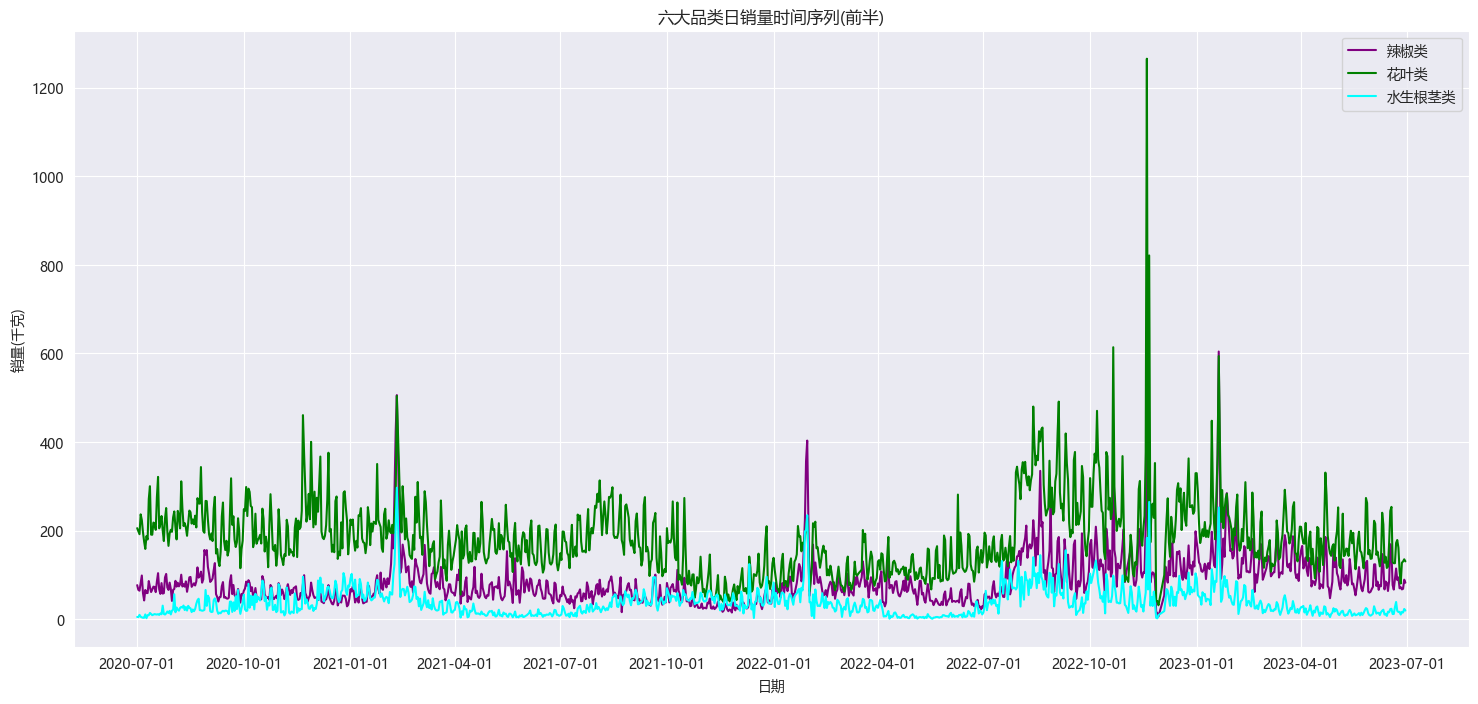

In [28]:
import matplotlib.dates as mdates


plt.figure(figsize=(18, 8))
colors = ['red', 'blue', 'olive', 'purple', 'green', 'cyan']

for category in category_array:
    category_series = daily_category_sales[daily_category_sales['分类名称'] == category].set_index('日期')['销量(千克)']
    plt.plot(category_series, label=category, color=colors[int(category_array.tolist().index(category)-int(len(category_array)/2))])
    if category == category_array[int(len(category_array)/2)-1]:
        break
plt.title('六大品类日销量时间序列(前半)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xlabel('日期')
plt.ylabel('销量(千克)')
plt.legend()
plt.show()

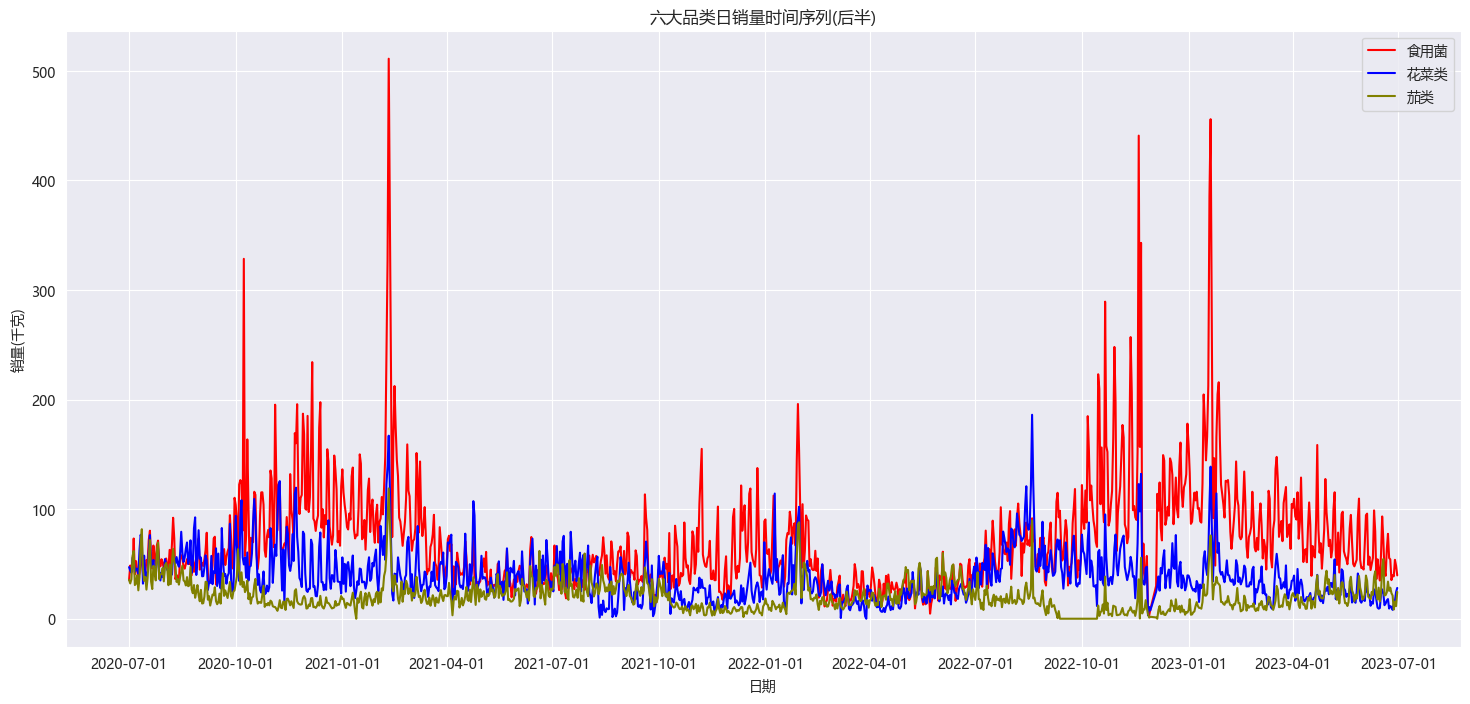

In [29]:
plt2 = plt.figure(figsize=(18, 8))
colors = ['red', 'blue', 'olive', 'purple', 'green', 'cyan']
for category in category_array[int(len(category_array)/2):]:
    category_series = daily_category_sales[daily_category_sales['分类名称'] == category].set_index('日期')['销量(千克)']
    plt.plot(category_series, label=category, color=colors[int(category_array.tolist().index(category)-int(len(category_array)/2))])
plt.title('六大品类日销量时间序列(后半)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xlabel('日期')
plt.ylabel('销量(千克)')
plt.legend()
plt.show()

Jarque-Bera test for 辣椒类: Statistic=16931.44809657513, p-value=0.0
辣椒类 销售量数据服从正态分布


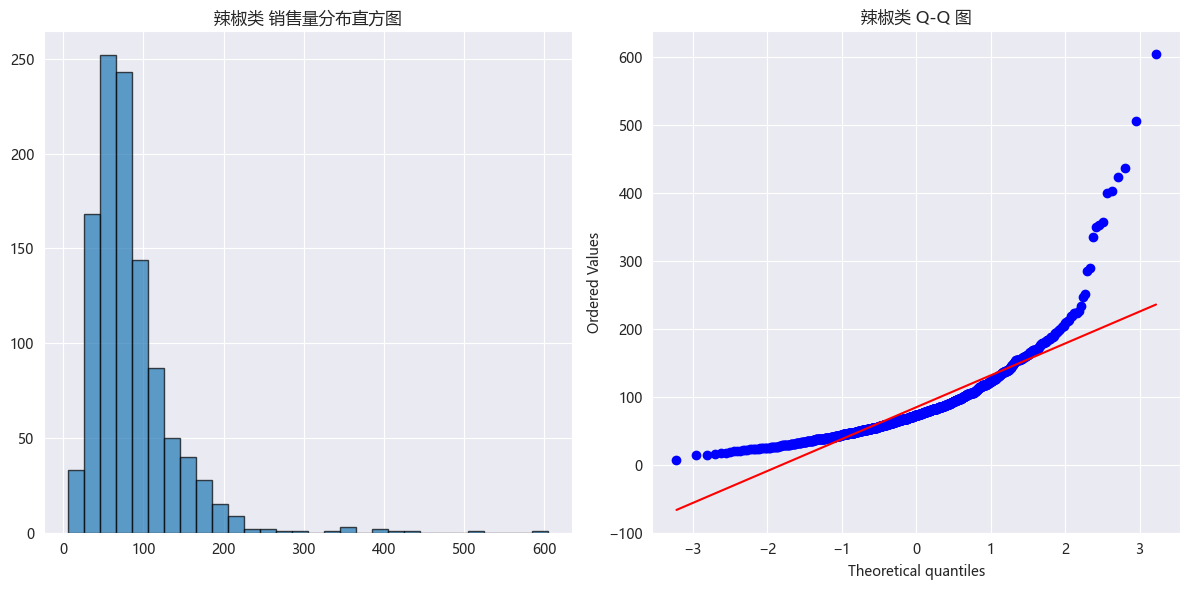

Jarque-Bera test for 花叶类: Statistic=32018.226598926216, p-value=0.0
花叶类 销售量数据服从正态分布


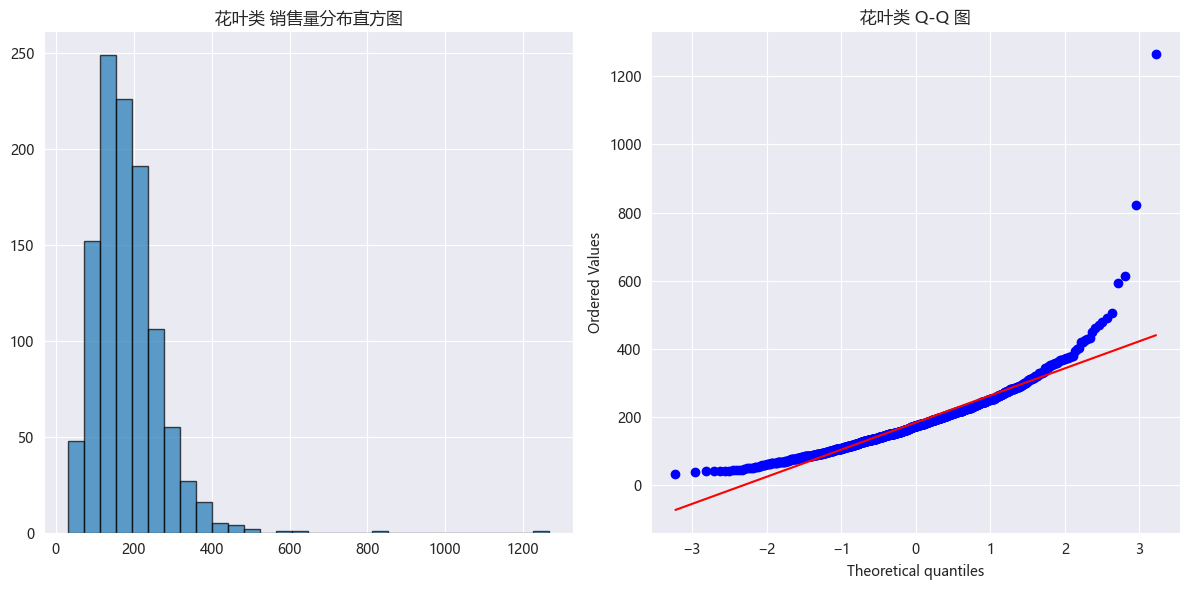

Jarque-Bera test for 水生根茎类: Statistic=7723.693497936343, p-value=0.0
水生根茎类 销售量数据服从正态分布


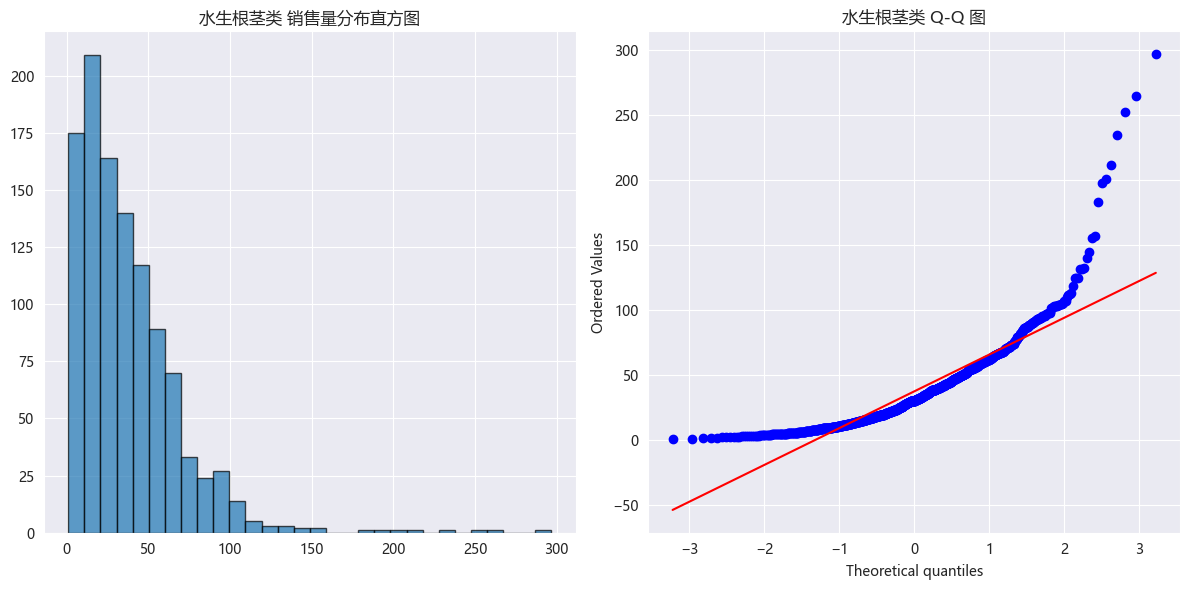

Jarque-Bera test for 食用菌: Statistic=14380.963890014855, p-value=0.0
食用菌 销售量数据服从正态分布


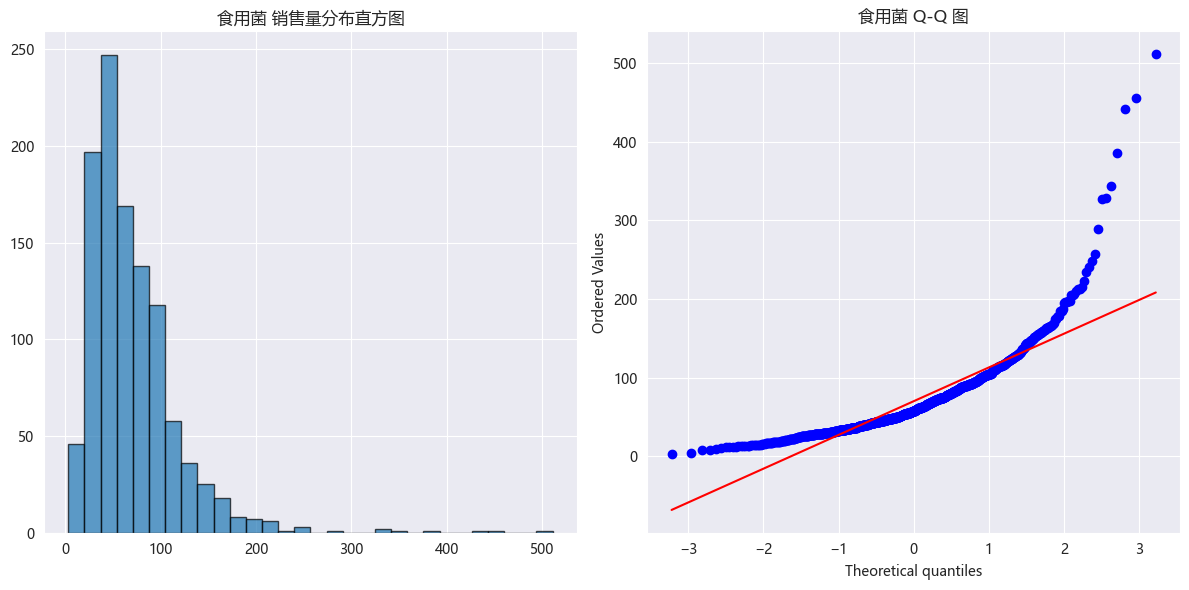

Jarque-Bera test for 花菜类: Statistic=1201.1733339191608, p-value=1.4740921545577125e-261
花菜类 销售量数据服从正态分布


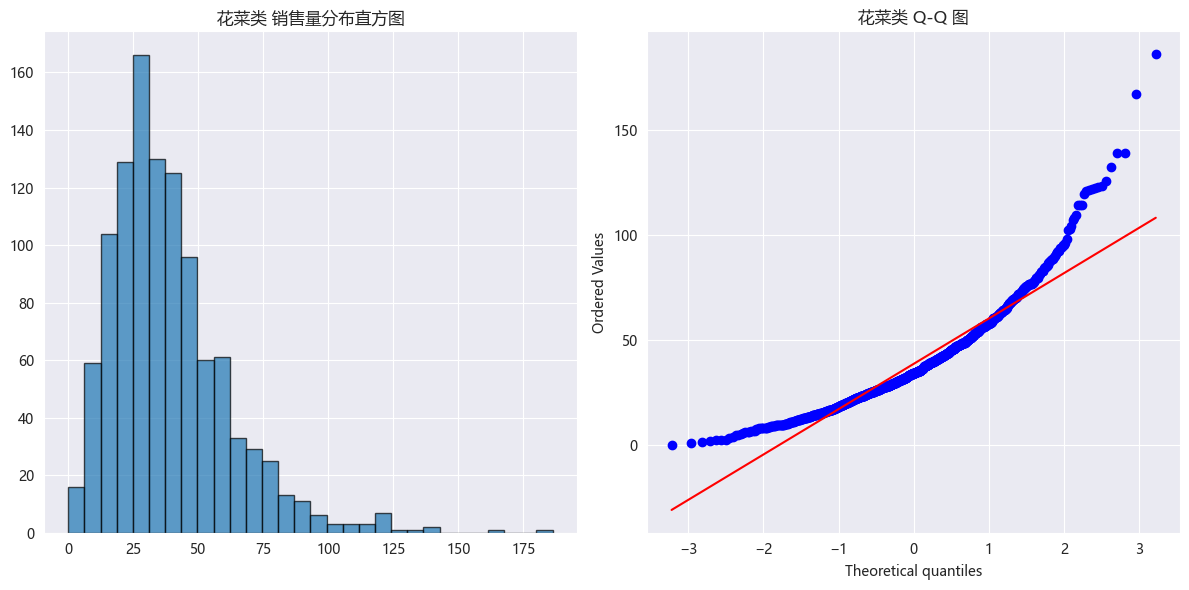

Jarque-Bera test for 茄类: Statistic=1720.7062923978733, p-value=0.0
茄类 销售量数据服从正态分布


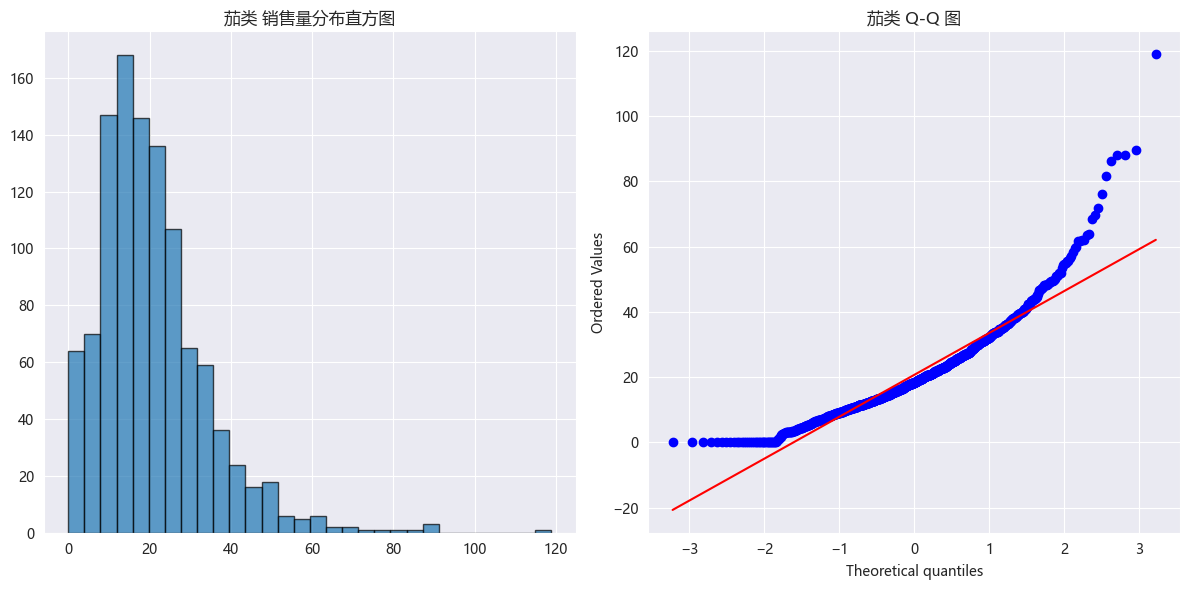

In [30]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# 假设 daily_category_sales 是包含分类名称、日期和销售量的 DataFrame
# 选择一个分类名称进行正态性检验
for i in range(len(category_array)):
    selected_category = category_array[i]  # 替换为实际的分类名称

    # 获取该分类的每日销售量数据
    category_series = daily_category_sales[daily_category_sales['分类名称'] == selected_category].set_index('日期')['销量(千克)']

    # 进行雅克-贝拉检验
    jb_test = stats.jarque_bera(category_series)
    print(f'Jarque-Bera test for {selected_category}: Statistic={jb_test.statistic}, p-value={jb_test.pvalue}')

    # 判断正态性
    if jb_test.pvalue < 0.05:
        print(f'{selected_category} 销售量数据服从正态分布')
    else:
        print(f'{selected_category} 销售量数据不服从正态分布')

# 可选：绘制销售量分布的直方图和Q-Q图
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(category_series, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'{selected_category} 销售量分布直方图')
    
    plt.subplot(1, 2, 2)
    stats.probplot(category_series, dist="norm", plot=plt)
    plt.title(f'{selected_category} Q-Q 图')
    
    plt.tight_layout()
    plt.show()


In [40]:
print(daily_category_sales.info)
print(daily_category_sales.index)
print(daily_category_sales.columns)

<bound method DataFrame.info of              日期   分类名称   销量(千克)
0    2020-07-01    辣椒类   76.715
1    2020-07-01    花叶类  205.402
2    2020-07-01  水生根茎类    4.850
3    2020-07-01    食用菌   35.365
4    2020-07-01    花菜类   47.076
...         ...    ...      ...
6505 2023-06-30    花叶类  130.464
6506 2023-06-30  水生根茎类   19.419
6507 2023-06-30    食用菌   39.572
6508 2023-06-30    花菜类   28.087
6509 2023-06-30     茄类   24.530

[6510 rows x 3 columns]>
RangeIndex(start=0, stop=6510, step=1)
Index(['日期', '分类名称', '销量(千克)'], dtype='object')


In [37]:
sales_data = daily_category_sales.iloc[:, 1:]
sales_data

,分类名称,销量(千克)
0,辣椒类,76.715
1,花叶类,205.402
2,水生根茎类,4.850
3,食用菌,35.365
4,花菜类,47.076
...,...,...
6505,花叶类,130.464
6506,水生根茎类,19.419
6507,食用菌,39.572
6508,花菜类,28.087


In [43]:
# 对数据进行透视，将分类名称作为列，销量作为值，日期作为索引
sales_data_pivot = daily_category_sales.pivot(index='日期', columns='分类名称', values='销量(千克)')
sales_data_pivot

分类名称,水生根茎类,花叶类,花菜类,茄类,辣椒类,食用菌
日期,,,,,,
2020-07-01,4.850,205.402,47.076,35.374,76.715,35.365
2020-07-02,4.600,198.362,43.943,32.199,66.064,48.510
2020-07-03,9.572,191.779,42.076,35.896,64.253,42.442
2020-07-04,5.439,236.587,55.662,57.067,81.282,47.262
2020-07-05,4.019,223.899,55.474,61.816,98.496,73.213
...,...,...,...,...,...,...
2023-06-26,10.384,80.524,8.083,21.224,72.185,39.582
2023-06-27,16.454,127.278,14.272,8.415,67.120,38.708
2023-06-28,14.946,130.182,16.069,15.651,68.534,53.742


In [46]:
# 调整sales_data_pivot的index为普通自增id
sales_data_pivot = sales_data_pivot.reset_index()
sales_data_pivot

分类名称,level_0,index,日期,水生根茎类,花叶类,花菜类,茄类,辣椒类,食用菌
0,0,0,2020-07-01,4.850,205.402,47.076,35.374,76.715,35.365
1,1,1,2020-07-02,4.600,198.362,43.943,32.199,66.064,48.510
2,2,2,2020-07-03,9.572,191.779,42.076,35.896,64.253,42.442
3,3,3,2020-07-04,5.439,236.587,55.662,57.067,81.282,47.262
4,4,4,2020-07-05,4.019,223.899,55.474,61.816,98.496,73.213
...,...,...,...,...,...,...,...,...,...
1080,1080,1080,2023-06-26,10.384,80.524,8.083,21.224,72.185,39.582
1081,1081,1081,2023-06-27,16.454,127.278,14.272,8.415,67.120,38.708
1082,1082,1082,2023-06-28,14.946,130.182,16.069,15.651,68.534,53.742
1083,1083,1083,2023-06-29,22.945,135.090,24.367,11.511,89.113,48.314


In [49]:
# 删除指定
sales_data_pivot = sales_data_pivot.drop(columns=['index'])
sales_data_pivot

分类名称,水生根茎类,花叶类,花菜类,茄类,辣椒类,食用菌
0,4.850,205.402,47.076,35.374,76.715,35.365
1,4.600,198.362,43.943,32.199,66.064,48.510
2,9.572,191.779,42.076,35.896,64.253,42.442
3,5.439,236.587,55.662,57.067,81.282,47.262
4,4.019,223.899,55.474,61.816,98.496,73.213
...,...,...,...,...,...,...
1080,10.384,80.524,8.083,21.224,72.185,39.582
1081,16.454,127.278,14.272,8.415,67.120,38.708
1082,14.946,130.182,16.069,15.651,68.534,53.742
1083,22.945,135.090,24.367,11.511,89.113,48.314


In [53]:
# 将sales_data_pivot的索引改名为index
sales_data_pivot.index.name = 'index'
sales_data_pivot

分类名称,水生根茎类,花叶类,花菜类,茄类,辣椒类,食用菌
index,,,,,,
0,4.850,205.402,47.076,35.374,76.715,35.365
1,4.600,198.362,43.943,32.199,66.064,48.510
2,9.572,191.779,42.076,35.896,64.253,42.442
3,5.439,236.587,55.662,57.067,81.282,47.262
4,4.019,223.899,55.474,61.816,98.496,73.213
...,...,...,...,...,...,...
1080,10.384,80.524,8.083,21.224,72.185,39.582
1081,16.454,127.278,14.272,8.415,67.120,38.708
1082,14.946,130.182,16.069,15.651,68.534,53.742


In [56]:
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

# 计算Spearman相关系数矩阵
# spearman_corr = daily_category_sales.groupby('日期').apply(lambda x: spearmanr(x['销量(千克)'], x['销量(千克)'])[0]).unstack()
spearman_sales_data = pd.read_excel('./SpearmanData.xlsx')
spearman_sales_data

,花菜类,食用菌,花叶类,辣椒类,茄类,水生根茎类
0,47.076,35.365,205.402,76.715,35.374,4.850
1,43.943,48.510,198.362,66.064,32.199,4.600
2,42.076,42.442,191.779,64.253,35.896,9.572
3,55.662,47.262,236.587,81.282,57.067,5.439
4,55.474,73.213,223.899,98.496,61.816,4.019
...,...,...,...,...,...,...
1080,8.083,39.582,80.524,72.185,21.224,10.384
1081,14.272,38.708,127.278,67.120,8.415,16.454
1082,16.069,53.742,130.182,68.534,15.651,14.946
1083,24.367,48.314,135.090,89.113,11.511,22.945


In [57]:
spearman_corr = spearman_sales_data.corr(method='spearman')
spearman_corr

,花菜类,食用菌,花叶类,辣椒类,茄类,水生根茎类
花菜类,1.000000,0.462420,0.633454,0.429713,0.193012,0.396029
食用菌,0.462420,1.000000,0.596225,0.534785,-0.114515,0.605351
花叶类,0.633454,0.596225,1.000000,0.595045,0.252733,0.438869
辣椒类,0.429713,0.534785,0.595045,1.000000,0.104238,0.333866
茄类,0.193012,-0.114515,0.252733,0.104238,1.000000,-0.209965
水生根茎类,0.396029,0.605351,0.438869,0.333866,-0.209965,1.000000


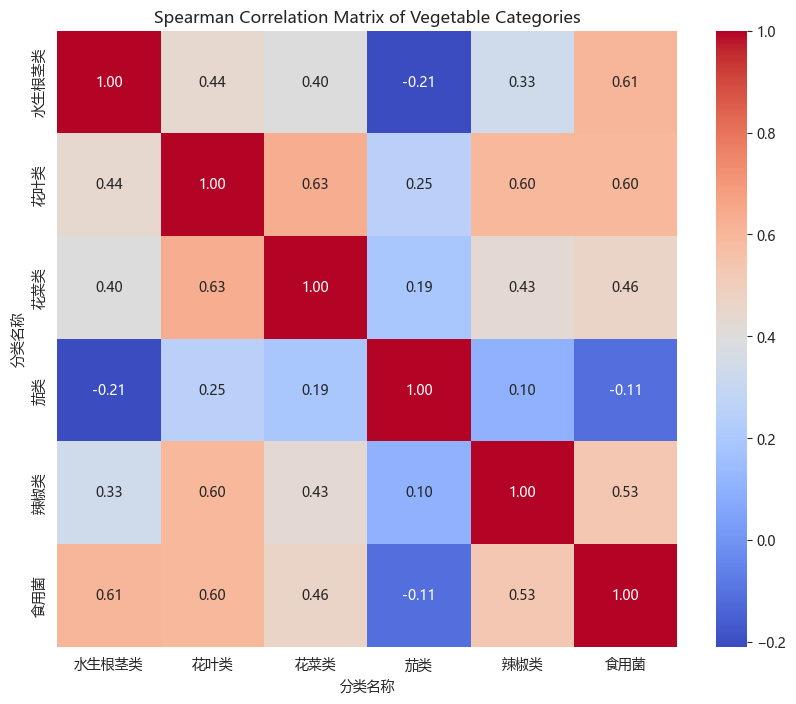

In [52]:
# 可视化相关性矩阵
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Matrix of Vegetable Categories')
plt.show()

In [59]:
from scipy.stats import spearmanr

# 假设sales_data已经被透视为pivoted_data，且包含六大蔬菜品类的销量
# 计算Spearman相关系数并进行显著性检验

# 提取六大蔬菜品类的列名
categories = spearman_sales_data.columns
categories

Index(['花菜类', '食用菌', '花叶类', '辣椒类', '茄类', '水生根茎类'], dtype='object')

In [61]:
spearman_sales_data['花菜类']

0       47.076
1       43.943
2       42.076
3       55.662
4       55.474
         ...  
1080     8.083
1081    14.272
1082    16.069
1083    24.367
1084    28.087
Name: 花菜类, Length: 1085, dtype: float64

In [64]:
# 将每个品类之间两两的Spearman相关系数和p值分别存储到两个矩阵中
spearman_corr_2 = pd.DataFrame(index=categories, columns=categories)
p_values_2 = pd.DataFrame(index=categories, columns=categories)
# 存储结果
results = []

# 逐对计算Spearman相关系数并进行检验
for i in range(len(categories)):
    for j in range(i + 1, len(categories)):
        category1 = categories[i]
        category2 = categories[j]
        
        # 计算Spearman相关系数和p值
        corr, p_value = spearmanr(spearman_sales_data[category1], spearman_sales_data[category2])
        # 存储结果
        spearman_corr_2.loc[category1, category2] = corr
        spearman_corr_2.loc[category2, category1] = corr
        p_values_2.loc[category1, category2] = p_value
        p_values_2.loc[category2, category1] = p_value
        # 将结果存储
        results.append({
            '品类1': category1,
            '品类2': category2,
            'Spearman相关系数': corr,
            'p值': p_value,
            '显著性': '显著' if p_value < 0.05 else '不显著'
        })

# 将结果转化为DataFrame以便查看
results_df = pd.DataFrame(results)

# 输出结果
print(results_df)
results_df

    品类1    品类2  Spearman相关系数             p值 显著性
0   花菜类    食用菌      0.462420   1.379263e-58  显著
1   花菜类    花叶类      0.633454  9.018908e-123  显著
2   花菜类    辣椒类      0.429713   5.512705e-50  显著
3   花菜类     茄类      0.193012   1.448289e-10  显著
4   花菜类  水生根茎类      0.396029   4.626609e-42  显著
5   食用菌    花叶类      0.596225  2.034260e-105  显著
6   食用菌    辣椒类      0.534785   2.720657e-81  显著
7   食用菌     茄类     -0.114515   1.567460e-04  显著
8   食用菌  水生根茎类      0.605351  1.845860e-109  显著
9   花叶类    辣椒类      0.595045  6.628070e-105  显著
10  花叶类     茄类      0.252733   2.842468e-17  显著
11  花叶类  水生根茎类      0.438869   2.675577e-52  显著
12  辣椒类     茄类      0.104238   5.839869e-04  显著
13  辣椒类  水生根茎类      0.333866   1.160572e-29  显著
14   茄类  水生根茎类     -0.209965   2.825354e-12  显著


,品类1,品类2,Spearman相关系数,p值,显著性
0,花菜类,食用菌,0.462420,1.379263e-58,显著
1,花菜类,花叶类,0.633454,9.018908e-123,显著
2,花菜类,辣椒类,0.429713,5.512705e-50,显著
3,花菜类,茄类,0.193012,1.448289e-10,显著
4,花菜类,水生根茎类,0.396029,4.626609e-42,显著
5,食用菌,花叶类,0.596225,2.034260e-105,显著
6,食用菌,辣椒类,0.534785,2.720657e-81,显著
7,食用菌,茄类,-0.114515,1.567460e-04,显著
8,食用菌,水生根茎类,0.605351,1.845860e-109,显著
9,花叶类,辣椒类,0.595045,6.628070e-105,显著


In [67]:
for i in range(len(categories)):
    spearman_corr_2.iloc[i, i] = 1
    p_values_2.iloc[i, i] = 1

spearman_corr_2
        
        

,花菜类,食用菌,花叶类,辣椒类,茄类,水生根茎类
花菜类,1,0.46242,0.633454,0.429713,0.193012,0.396029
食用菌,0.46242,1,0.596225,0.534785,-0.114515,0.605351
花叶类,0.633454,0.596225,1,0.595045,0.252733,0.438869
辣椒类,0.429713,0.534785,0.595045,1,0.104238,0.333866
茄类,0.193012,-0.114515,0.252733,0.104238,1,-0.209965
水生根茎类,0.396029,0.605351,0.438869,0.333866,-0.209965,1


In [68]:
p_values_2

,花菜类,食用菌,花叶类,辣椒类,茄类,水生根茎类
花菜类,1,0.0,0.0,0.0,0.0,0.0
食用菌,0.0,1,0.0,0.0,0.000157,0.0
花叶类,0.0,0.0,1,0.0,0.0,0.0
辣椒类,0.0,0.0,0.0,1,0.000584,0.0
茄类,0.0,0.000157,0.0,0.000584,1,0.0
水生根茎类,0.0,0.0,0.0,0.0,0.0,1


In [14]:
import re
import pandas as pd
# 假设你已经读取了表格并存储在vegetable_data中
# 我们将对“单品名称”列进行处理

# 定义函数去除括号及其内容
def clean_item_name(name):
    return re.sub(r'\(.*?\)', '', name).strip()
vegetable_data = pd.read_excel('./附件1.xlsx')
# 应用函数到“单品名称”列
vegetable_data['单品名称'] = vegetable_data['单品名称'].apply(clean_item_name)
vegetable_data

,单品编码,单品名称,分类编码,分类名称
0,102900005115168,牛首生菜,1011010101,花叶类
1,102900005115199,四川红香椿,1011010101,花叶类
2,102900005115625,本地小毛白菜,1011010101,花叶类
3,102900005115748,白菜苔,1011010101,花叶类
4,102900005115762,苋菜,1011010101,花叶类
...,...,...,...,...
246,106958851400125,海鲜菇,1011010801,食用菌
247,106971533450003,海鲜菇,1011010801,食用菌
248,106971533455008,海鲜菇,1011010801,食用菌
249,106973223300667,虫草花,1011010801,食用菌


In [15]:
vegetable_data.to_excel('./蔬菜细分去重第一步.xlsx', index=False)
vegetable_data = pd.read_excel('./蔬菜细分去重第一步.xlsx')
vegetable_data = vegetable_data.drop(columns=['分类编码'])
vegetable_sales_data_merged = pd.merge(simple_sales_data, vegetable_data, on='单品编码', how='left')

vegetable_sales_data_merged

,销售日期,单品编码,销量(千克),单品名称,分类名称
0,2020-07-01,102900005117056,0.396,泡泡椒,辣椒类
1,2020-07-01,102900005115960,0.849,大白菜,花叶类
2,2020-07-01,102900005117056,0.409,泡泡椒,辣椒类
3,2020-07-01,102900005115823,0.421,上海青,花叶类
4,2020-07-01,102900005115908,0.539,菜心,花叶类
...,...,...,...,...,...
878037,2023-06-30,102900005115250,0.284,西峡花菇,食用菌
878038,2023-06-30,102900011022764,0.669,长线茄,茄类
878039,2023-06-30,102900005115250,0.125,西峡花菇,食用菌
878040,2023-06-30,102900011016701,0.252,芜湖青椒,辣椒类


In [16]:
sales_grouped = vegetable_sales_data_merged.groupby(['销售日期', '单品名称', '分类名称'],as_index=False)['销量(千克)'].sum()
sales_grouped

,销售日期,单品名称,分类名称,销量(千克)
0,2020-07-01,七彩椒,辣椒类,1.909
1,2020-07-01,上海青,花叶类,11.476
2,2020-07-01,云南油麦菜,花叶类,32.579
3,2020-07-01,云南生菜,花叶类,41.966
4,2020-07-01,外地茼蒿,花叶类,2.623
...,...,...,...,...
43428,2023-06-30,野生粉藕,水生根茎类,0.231
43429,2023-06-30,金针菇,食用菌,13.000
43430,2023-06-30,长线茄,茄类,8.789
43431,2023-06-30,青红杭椒组合装,辣椒类,4.000


In [18]:
print(vegetable_sales_data_merged.info())

print(sales_grouped.info())

sales_grouped.to_excel('./蔬菜细分销售数据去重(true).xlsx', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878042 entries, 0 to 878041
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   销售日期    878042 non-null  datetime64[ns]
 1   单品编码    878042 non-null  int64         
 2   销量(千克)  878042 non-null  float64       
 3   单品名称    878042 non-null  object        
 4   分类名称    878042 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 33.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43433 entries, 0 to 43432
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   销售日期    43433 non-null  datetime64[ns]
 1   单品名称    43433 non-null  object        
 2   分类名称    43433 non-null  object        
 3   销量(千克)  43433 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.3+ MB
None


以单品的总销售量、每日最大销售量和日均销售量为指标，对蔬菜品类进行K-means++聚类。

In [32]:
# 先整理数据
# 读取数据
k_means_part = sales_grouped.copy()
# 对k_means_part1进行处理求出每个单品名称的总销售量，最大销售量和日均销售量
k_means_part['销售日期'] = pd.to_datetime(k_means_part['销售日期'])
# 计算销售日期的天数
# 取最后一个销售日期的天数减去第一个销售日期。得到销售日期的天数
print(k_means_part['销售日期'].max() - k_means_part['销售日期'].min()
)
k_means_part = k_means_part.drop(columns=['销售日期'])


1094 days 00:00:00


In [33]:

k_means_part = k_means_part.groupby(['单品名称', '分类名称'], as_index=False).agg(
    总销售量=('销量(千克)', 'sum'),
    最大销售量=('销量(千克)', 'max'),
    日均销售量=('销量(千克)', 'mean')
)
k_means_part.to_excel('./蔬菜细分销售聚类.xlsx', index=False)
k_means_part


,单品名称,分类名称,总销售量,最大销售量,日均销售量
0,七彩椒,辣椒类,651.401,17.439,1.219852
1,上海青,花叶类,10679.386,118.000,9.915864
2,东门口小白菜,花叶类,1543.882,15.100,3.549154
3,丝瓜尖,花叶类,14.227,3.013,0.748789
4,云南油麦菜,花叶类,19165.079,166.000,17.679962
...,...,...,...,...,...
146,黄花菜,花叶类,1.784,0.670,0.297333
147,黑油菜,花叶类,101.125,29.631,3.745370
148,黑牛肝菌,食用菌,5.084,2.000,0.847333
149,黑皮鸡枞菌,食用菌,9.795,2.000,0.515526


D:\Programs\Anaconda3\envs\anaconda39\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


聚类中心：
           总销售量       最大销售量      日均销售量
0    479.560691   10.773545   2.639296
1  24446.417714  198.734714  31.635248
2  12273.073600  228.213200  12.975131
3   6414.961069   82.578966  12.248237


D:\Programs\Anaconda3\envs\anaconda39\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


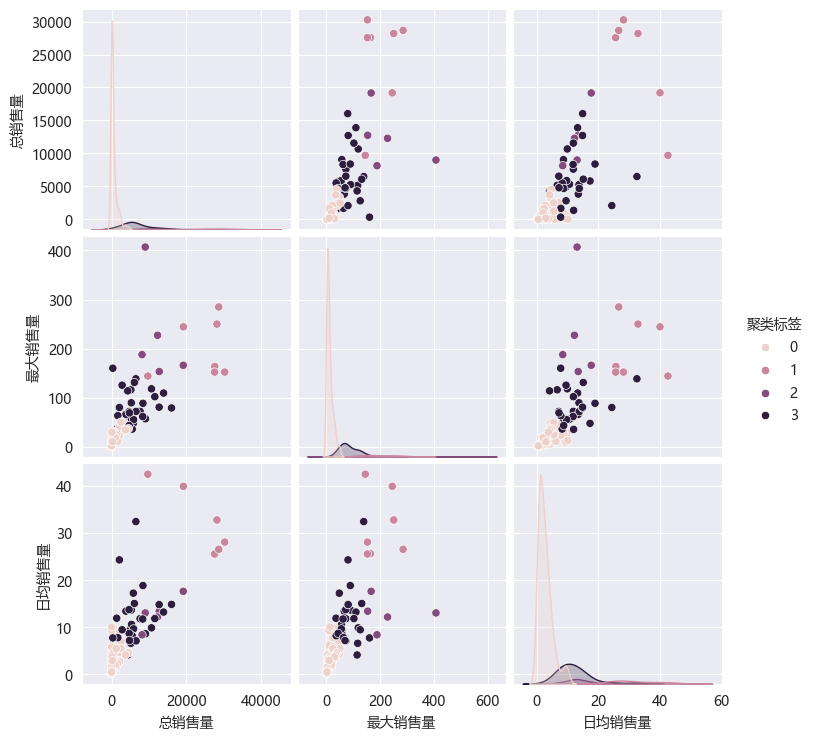

       单品名称  聚类标签
0       七彩椒     0
1       上海青     3
2    东门口小白菜     0
3       丝瓜尖     0
4     云南油麦菜     2
..      ...   ...
146     黄花菜     0
147     黑油菜     0
148    黑牛肝菌     0
149   黑皮鸡枞菌     0
150     龙牙菜     0

[151 rows x 2 columns]


In [36]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rc("font",family='Microsoft YaHei')

# 假设你已有一个包含数据的DataFrame，名为 df
# df = pd.DataFrame({
#     '单品名称': [...],
#     '总销售量': [...],
#     '最大销售量': [...],
#     '日均销售量': [...]
# })

# 提取特征数据
X = k_means_part[['总销售量', '最大销售量', '日均销售量']]

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 应用 K-means++ 聚类算法
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)
k_means_part['聚类标签'] = kmeans.fit_predict(X_scaled)

# 获取聚类中心（反标准化回原始尺度）
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['总销售量', '最大销售量', '日均销售量'])

# 输出每个聚类中心
print("聚类中心：")
print(cluster_centers_df)

# 可视化聚类结果
sns.pairplot(k_means_part, hue='聚类标签', vars=['总销售量', '最大销售量', '日均销售量'])
plt.show()

# 输出每个单品的聚类结果
print(k_means_part[['单品名称', '聚类标签']])


D:\Programs\Anaconda3\envs\anaconda39\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


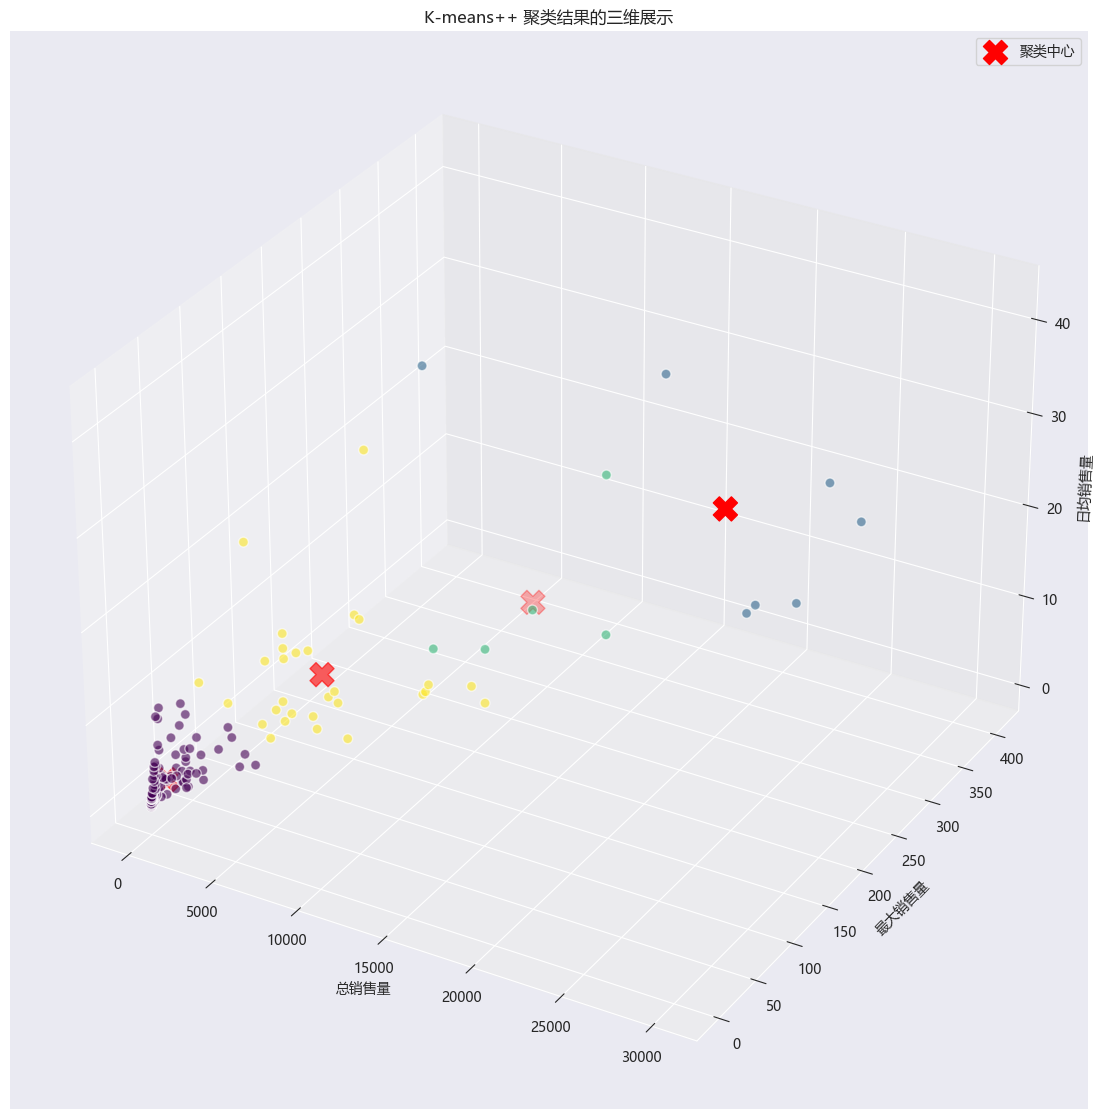

In [44]:

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 应用 K-means++ 聚类算法
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)
k_means_part['聚类标签'] = kmeans.fit_predict(X_scaled)

# 获取聚类中心（反标准化回原始尺度）
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# 创建三维绘图
fig = plt.figure(figsize=(24, 14))
ax = fig.add_subplot(111, projection='3d')

# 绘制每个类别的数据点
scatter = ax.scatter(
    k_means_part['总销售量'], k_means_part['最大销售量'], k_means_part['日均销售量'], 
    c=k_means_part['聚类标签'], cmap='viridis', s=50, alpha=0.6, edgecolors='w'
)

# 绘制聚类中心
ax.scatter(
    cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], 
    s=300, c='red', marker='X', label='聚类中心'
)

# 设置轴标签
ax.set_xlabel('总销售量')
ax.set_ylabel('最大销售量')
ax.set_zlabel('日均销售量')

# 添加图例
ax.legend()
plt.title('K-means++ 聚类结果的三维展示')
plt.show()
